# Evaluation of Multi-Tier Framework for measuring access to cooking solutions

### Importing the useful libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
import math
import plotly.express as px

### Importing the dataset

In [19]:
df = pd.read_csv('Main_dataset.csv')

In [20]:
df.head()

,Unnamed: 0,HHID,Cluster,strata,Province,District,Sector,Cellule,Village,B1,...,T28,T28B,T28C,DATE_START,TIME_START,DATE_END,TIME_END,cluster,sample_weight,Locality
0,0,1.102021e+12,1,11,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,2.0,...,NaN,NaN,NaN,18/11/2016,12:05,18/11/2016,12:49,11,476.61765,Rural
1,1,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,10:23,18/11/2016,11:26,12,370.04202,Rural
2,2,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,11:32,18/11/2016,12:24,12,370.04202,Rural
3,3,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,10:30,18/11/2016,11:17,12,370.04202,Rural
4,4,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,No,NaN,NaN,18/11/2016,10:14,18/11/2016,11:28,12,370.04202,Rural


### NOTE

The MTF for access to modern energy cooking solutions has been simplified for four of the six attributes (Cooking Exposure, Cookstove Efficiency, Fuel Availability, and Safety of Primary Cookstove) because threshold values for each tier have not been approved by a competent agency and there is currently no system of certification and labelling for cooking solutions in place that could enable easy identification of cooking solutions during household surveys.

### Analysing different Attributes

Attributes which are analysed for MTF_Rwanda_Questionnaire_Household: 

1. Cooking Exposure
2. Cookstove Efficiency
3. Convenience
4. Safety of Primary Cookstove
5. Affordability 
6. Fuel Availability

# Attribute: Cooking Exposure

Cooking exposure is divided into different categories:

Pg 39, These categories are approximate. The actual tier allocation needs to be done through appropriate stove tests, reflecting local cooking practices and conditions.

1. Emission: Fuel (I18, but not provided in the dataset)
2. Emission: Stove Design (No information provided in the report or questionnaire)
3. Ventilation: Volume of Kitchen (Volume of the kitchen is also used to calculate the tier status for Cooking Exposure, but it is not included in the analysis for Rwanda because the MTF survey did not collect information on height of the cooking space, Pg 28)
4. Ventilation: Structure (I16, Not enough data for analysis)
5. Ventilation Level (No information provided in the report or questionnaire)
6. Contact Time (Not used to calculate an individual stove’s tier for Cooking Exposure but used to weight each stove’s tier for Cooking Exposure in the calculation of a household’s tier for Cooking Exposure, Pg 95)

In [21]:
df_cooking_exposure= df[['I16']]

In [22]:
df_cooking_exposure.tail()

,I16
3290,NaN
3291,2.0
3292,2.0
3293,NaN
3294,NaN


### Renaming the column

In [23]:
df_cooking_exposure.columns = ['Ventilation_structure']

In [24]:
df_cooking_exposure.tail()

,Ventilation_structure
3290,NaN
3291,2.0
3292,2.0
3293,NaN
3294,NaN


### Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [25]:
df_cooking_exposure["Ventilation_structure"] = df_cooking_exposure.Ventilation_structure.apply(lambda x: "Missing_data" if math.isnan(x) else x)

In [26]:
df_cooking_exposure.head()

,Ventilation_structure
0,6
1,Missing_data
2,Missing_data
3,Missing_data
4,1


### Removing "Missing_data"

In [27]:
df2 = df_cooking_exposure[df_cooking_exposure != 'Missing_data'] 

### Visualizing the TIER with "missing data"

Text(0.5, 1.0, 'Number of windows')

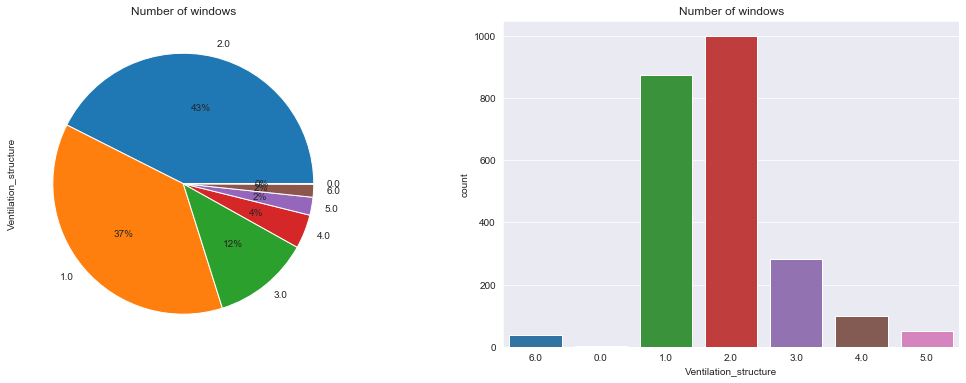

In [28]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df2['Ventilation_structure'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('Number of windows')

#Boxplot
sns.countplot('Ventilation_structure',data=df2,ax=ax[1])
ax[1].set_title('Number of windows')


# Attribute: Cookstove Efficiency

Pg 28, No information provided int he dataset/questionnaire

Cookstove Efficiency is low for most households, particularly in rural areas. Because lab testing
results on emissions levels are not available, this report uses a proxy indicator to calculate the
tier for Cookstove Efficiency. Households that use a three-stone or traditional stove are in Tier
0 for Cookstove Efficiency, households that use an ICS are in Tiers 1–3, and households that
use a clean fuel stove are in Tier 5.

# Attribute: Convenience


I21, But no infomation provided in the dataset (No column with I21 exists)

# Attribute: Safety of Primary Cookstove

I31 determines the type of injury. However, nothing provided in the dataset to analyse

# Attribute: Affordability 

(Pg 40, Affordability could not be calculated for Rwanda because the survey was not able to collect expenditure information)

(Pg 95, In this report, cookstove cost was not considered when calculating the Affordability tier due to data limitations which hindered making this calculation.)

# Attribute: Fuel Availability

No information provided in the report, survey or the dataset.